# UNAD 

# Realizado por:

1. Juliana Alejandra Diaz Vergara

# Regresión Logística 

# Pasos de la Actividad 

1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo
8. Interpretar, analizar y documentar los resultados obtenidos.  

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [1]:
#Cargar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Lectura de Datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv ("C:/Users/JULIANA DIAZ/Downloads/Titanic-Dataset.csv")

In [3]:
#Realizamos lectura de los datos para el analisis exploratorio 
Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Descripcion de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

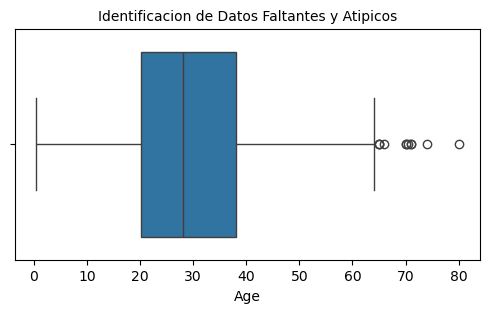

In [5]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

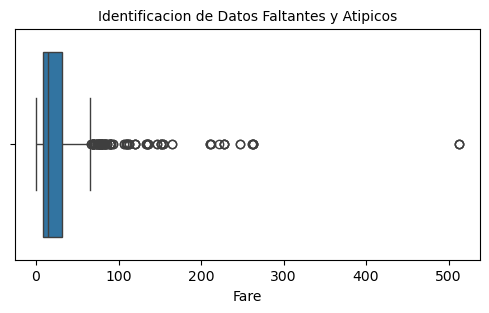

In [6]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

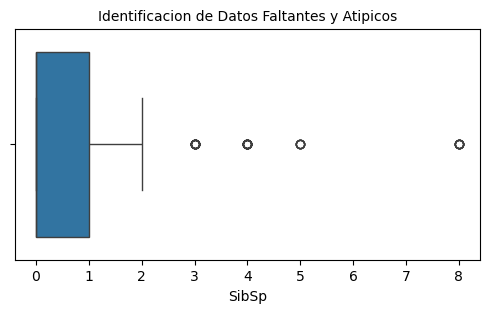

In [7]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

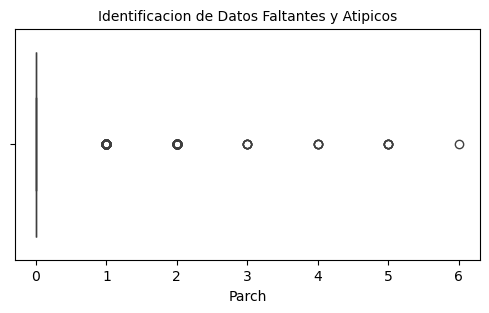

In [8]:
#Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Parch'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [54]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
Datos = pd.read_csv("C:/Users/JULIANA DIAZ/Downloads/Titanic-Dataset.csv")

# 1. Eliminar columnas irrelevantes
Datos = Datos.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [55]:
# Resumen de valores faltantes
print(Datos.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [56]:
# Imputar valores faltantes en 'Age' con la mediana
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].median())

# Imputar valores faltantes en 'Embarked' con la moda
Datos['Embarked'] = Datos['Embarked'].fillna(Datos['Embarked'].mode()[0])


In [57]:
# Verificar nuevamente valores faltantes
print(Datos.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [58]:
# Codificar variables categóricas ('Sex' y 'Embarked')
label_encoder = LabelEncoder()
Datos['Sex'] = label_encoder.fit_transform(Datos['Sex'])
Datos['Embarked'] = label_encoder.fit_transform(Datos['Embarked'])

In [59]:
# Inspeccionar el dataset preprocesado
print("Datos preprocesados:")
print(Datos.head())

Datos preprocesados:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


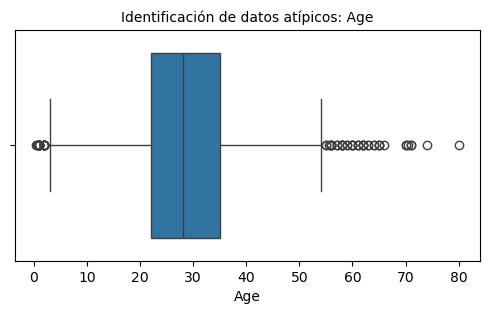

In [60]:
# Visualizar valores atípicos en 'Age'
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de datos atípicos: Age', fontsize=10)
plt.show()

In [61]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(Datos.describe())


Estadísticas descriptivas:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    1.536476  
std     49.693429    0.791503  
min      0.000000    0.000000  
25%      7.910400    1.000000  
50%     14.454200    2.000000  
75%     31.000000 

In [62]:
# Guardar los datos preprocesados en un nuevo archivo
Datos.to_csv('Titanic-Dataset-Preprocesado.csv', index=False)
print("Datos preprocesados guardados.")

Datos preprocesados guardados.


In [63]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [64]:
# Total de personas que sobrevivieron

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [65]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [95]:
# Porcentaje de datos para entrenamiento (train) = 90% , y para prueba (test) = 10%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state= 0)

In [96]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
890       3    1  32.0      0      0    7.7500         1
473       2    0  23.0      0      0   13.7917         0
836       3    1  21.0      0      0    8.6625         2
329       1    0  16.0      0      1   57.9792         0
737       1    1  35.0      0      0  512.3292         0
..      ...  ...   ...    ...    ...       ...       ...
490       3    1  28.0      1      0   19.9667         2
528       3    1  39.0      0      0    7.9250         2
48        3    1  28.0      2      0   21.6792         0
618       2    0   4.0      2      1   39.0000         2
80        3    1  22.0      0      0    9.0000         2

[801 rows x 7 columns]


In [97]:
print (Y_train)

890    0
473    1
836    0
329    1
737    1
      ..
490    0
528    0
48     0
618    1
80     0
Name: Survived, Length: 801, dtype: int64


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [98]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de Y_train:", Y_train.shape)

Tamaño de X_train: (801, 7)
Tamaño de Y_train: (801,)


In [99]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.preprocessing")

In [100]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

# Supongamos que tienes un DataFrame con X (características) y Y (etiquetas)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Combinar X_train y Y_train en un solo DataFrame para garantizar que las filas se mantengan sincronizadas
train_data = pd.concat([X_train, Y_train], axis=1)

# Eliminar filas con valores faltantes
train_data = train_data.dropna()

# Volver a separar X_train y Y_train
X_train = train_data.drop(columns=[Y_train.name])  # Eliminar la columna de Y_train
Y_train = train_data[Y_train.name]  # Obtener la columna de Y_train

# Codificar variables categóricas (One-Hot Encoding para X_train y X_test)
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train),
    columns=encoder.get_feature_names_out(X_train.columns),
    index=X_train.index
)
X_test_encoded = pd.DataFrame(
    encoder.transform(X_test),
    columns=encoder.get_feature_names_out(X_test.columns),
    index=X_test.index
)

# Verificar si hay columnas faltantes en X_test_encoded y rellenarlas con ceros
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Asegurar que las columnas estén en el mismo orden
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Verificar dimensiones después de la codificación
print(f"Dimensiones de X_train_encoded: {X_train_encoded.shape}")
print(f"Dimensiones de Y_train: {Y_train.shape}")

# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train_encoded, Y_train)

# Crear el modelo de predicción
Prediccion = modelo_regresion.predict(X_test_encoded)

# Evaluar el desempeño del modelo
print(classification_report(Y_test, Prediccion))


Dimensiones de X_train_encoded: (801, 341)
Dimensiones de Y_train: (801,)
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



In [101]:
print (Y_test)

709    1
439    0
840    0
720    1
39     1
      ..
493    0
215    1
309    1
822    0
250    0
Name: Survived, Length: 90, dtype: int64


In [102]:
print (Prediccion)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0]


# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [103]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

# Supongamos que tienes un DataFrame con X (características) y Y (etiquetas)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Combinar X_train y Y_train en un solo DataFrame para garantizar que las filas se mantengan sincronizadas
train_data = pd.concat([X_train, Y_train], axis=1)

# Eliminar filas con valores faltantes
train_data = train_data.dropna()

# Volver a separar X_train y Y_train
X_train = train_data.drop(columns=[Y_train.name])  # Eliminar la columna de Y_train
Y_train = train_data[Y_train.name]  # Obtener la columna de Y_train

# Codificar variables categóricas (One-Hot Encoding para X_train y X_test)
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train),
    columns=encoder.get_feature_names_out(X_train.columns),
    index=X_train.index
)
X_test_encoded = pd.DataFrame(
    encoder.transform(X_test),
    columns=encoder.get_feature_names_out(X_test.columns),
    index=X_test.index
)

# Verificar si hay columnas faltantes en X_test_encoded y rellenarlas con ceros
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Asegurar que las columnas estén en el mismo orden
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Verificar dimensiones después de la codificación
print(f"Dimensiones de X_train_encoded: {X_train_encoded.shape}")
print(f"Dimensiones de Y_train: {Y_train.shape}")

# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train_encoded, Y_train)

# Crear el modelo de predicción
Prediccion = modelo_regresion.predict(X_test_encoded)

# Evaluar el desempeño del modelo
print(classification_report(Y_test, Prediccion))


Dimensiones de X_train_encoded: (801, 341)
Dimensiones de Y_train: (801,)
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



# 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

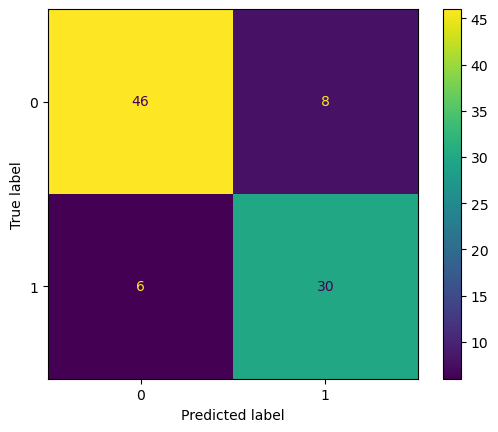

In [104]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

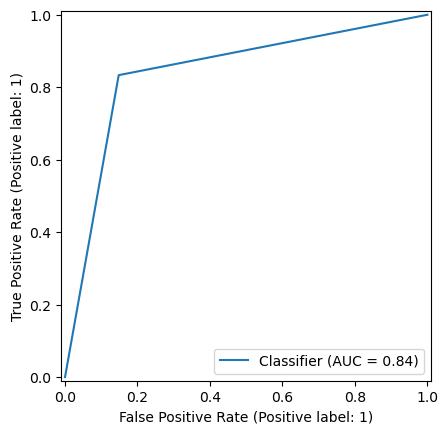

In [105]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

# 8. Interpretar, analizar y documentar los resultados obtenidos.

●	Precisión: Mide la exactitud de las predicciones positivas. Para la clase 0, la precisión es alta (88%), lo que significa que la mayoría de las predicciones hechas como clase 0 fueron correctas.Para la clase 1, la precisión es un poco menor (79%), lo que indica que hubo más confusiones al identificarla.

●	Recall: Evalúa la capacidad del modelo para identificar correctamente todas las instancias positivas de cada clase. Para la clase 0, el recall es del 85%, lo que significa que el modelo identifica la mayoría de los casos que realmente pertenecen a esta clase. Para la clase 1, el recall es del 83%, indicando que también logra capturar la mayoría de los verdaderos positivos, aunque con un desempeño ligeramente menor.

●	F1 Score: Es la media armónica entre precisión y recall, proporcionando una métrica equilibrada para evaluar el rendimiento del modelo. Para la clase 0, el F1 Score es 0.87, reflejando un buen equilibrio entre su precisión y recall. Para la clase 1, el F1 Score es 0.81, lo que indica un desempeño razonable, aunque algo inferior comparado con la clase 0.

●	Accuracy (Exactitud): El modelo tiene una exactitud del 84%, lo que significa que logra clasificar correctamente el 84% de los casos, considerando tanto las clases positivas como negativas.

●	 Macro avg: Es el promedio de precisión, recall y F1-score entre todas las clases, sin ponderación por el número de instancias. En este caso, el valor de macro avg es 0.84 para precisión, 0.84 para recall y 0.84 para F1-score. Esto significa que, en promedio, el modelo tiene un rendimiento equilibrado en ambas clases, ya que el macro promedio da el mismo valor para precisión, recall y F1 Score.

●	Weighted avg: Es el promedio ponderado de precisión, recall y F1-score considerando la cantidad de instancias de cada clase. Los valores de Precisión: 0.85, los de Recall: 0.84 y los de F1 Score: 0.85 indican que el weighted avg muestra que el modelo tiene un buen desempeño general, ya que pondera más las clases con mayor número de instancias. En este caso, los valores son bastante buenos, lo que indica que el modelo se ajusta bien a la distribución de las clases en el conjunto de datos.

De la matriz de Confusión podemos interpretar:

●	Verdaderos Positivos (VP):416. El modelo predijo correctamente 16 instancias que pertenecían a la clase 0

●	Verdaderos Negativos (VN)3013. El modelo predijo correctamente 13 instancias que pertenecían a la clase.

●	Falsos Positivos (FP): 8. El modelo no clasificó incorrectamente ninguna instancia de la clase 1 como clase 0.

●	Falsos Negativos (FN): 6. El modelo clasificó incorrectamente 1 instancia de la clase 0 como clase 1

De la curva de precisión del modelo se puede interpretar:

●	 Curva ROC: La curva muestra que el modelo logra un buen equilibrio entre verdaderos positivos y falsos positivos en la mayoría de los umbrales.La cercanía al vértice superior izquierdo indica que el modelo tiene una buena capacidad predictiva.

●	AUC: El AUC de este modelo es 0.84, lo que indica un buen desempeño general.

●	 Interpretación del AUC: Un AUC de 0.84 significa que el modelo tiene una probabilidad del 84% de clasificar correctamente una instancia positiva como positiva y una instancia negativa como negativa.e 1
